Day 3 problem statements

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [104]:
#PROBLEM STATEMENT 10

hospital_data = pd.read_csv("Data/hospitals.csv")

metadata = pd.read_csv("Data/metadata.csv")

acronym_mapping ={'PHC':'Number of Primary Health Centers(PHCs)','CHC':'Community Health Centers(CHCs)','SDH':'Sub-District/Divisional Hospitals(SDHs)','DH':'District Hospitals(DHs)'}
hospital_data.rename(columns={hospital_data.columns[0]: 'State/UT'}, inplace=True)

hospital_data.rename(columns=acronym_mapping, inplace=True)

hospital_data.to_csv("Clean data/hospitals.csv", index=False)

print("Headers renamed and data saved successfully.")


Headers renamed and data saved successfully.


In [105]:
#PROBLEM STATEMENT 11

def standardize_state_names(data, mapping):
    standardized_data = []
    for item in data:
        if item in mapping:
            standardized_data.append(mapping[item])
        else:
            standardized_data.append(item)
    return standardized_data

def fix_state_names_and_save(data):
    state_mapping = {
        "UP": "Uttar Pradesh",
        "TN": "Tamil Nadu",
        # Add more mappings as needed
    }
    
    # Fix State/UT names
    fixed_data = standardize_state_names(data, state_mapping)
    
    # Save data in CSV file
    folder_path = "Clean data"
    file_path = os.path.join(folder_path, "all_hospitals.csv")
    
    # Create the directory if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Write data to CSV
    with open(file_path, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        for row in fixed_data:
            writer.writerow([row])
    
    print(f"Data saved to {file_path}")

    return fixed_data

# Read data from uploaded CSV file
uploaded_file_path = "Data/housing-colnames.csv"  # Change to your file path
with open('Data/housing-colnames.csv', "r") as csvfile:
    reader = csv.reader(csvfile)
    data = [row[0] for row in reader]

# Fix State/UT names and save the data
fixed_data = fix_state_names_and_save(data)
print(fixed_data)

Data saved to Clean data\all_hospitals.csv
['State Code', 'State Name', 'District Code', 'District Name', 'Tehsil Code', 'Tehsil Name', 'Town Code', 'Ward No', 'Area Name', 'Rural/Urban', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68', 'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78', 'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100', 'c101', 'c102', 'c103', 'c104', 'c105', 'c106', 'c107', 'c108', 'c109', 'c110', 'c111', 'c112', 'c113', 'c114', 'c115', 'c116', 'c117', 'c118', 'c119', 'c120', 'c121', 'c122', 'c123

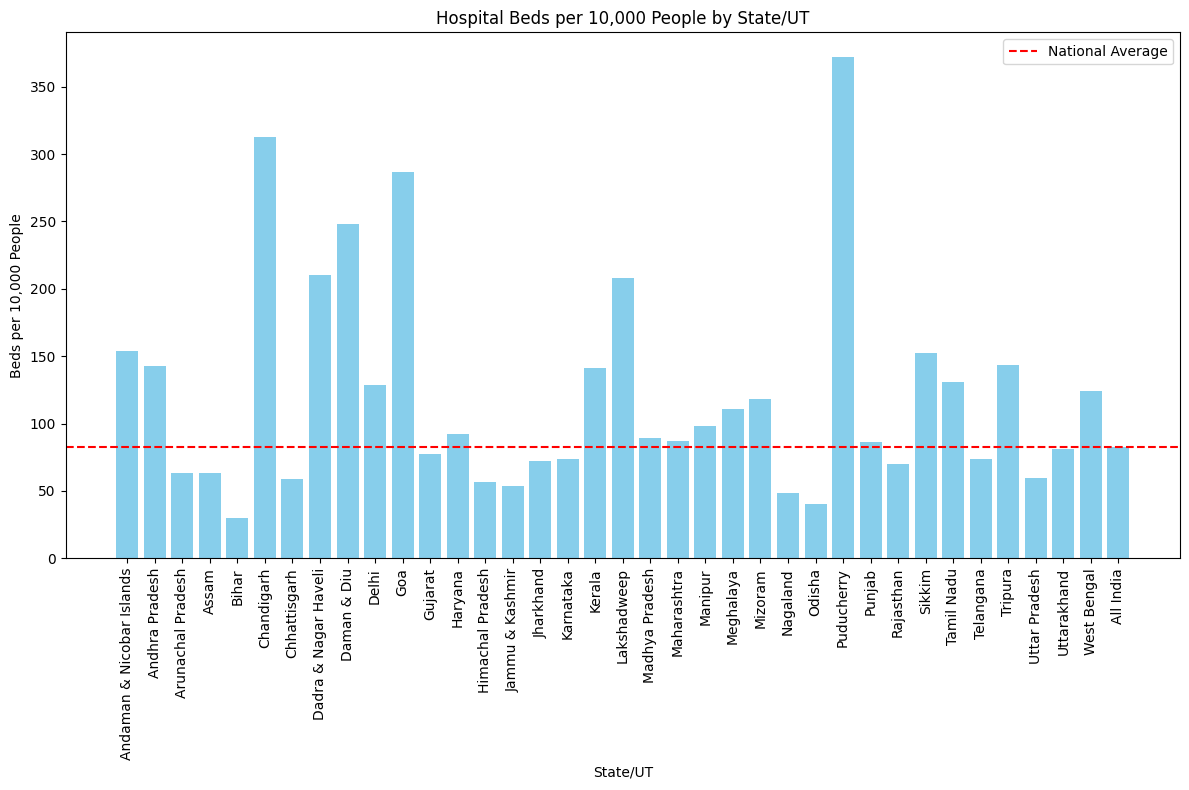

States/UTs with the least beds per 10,000 people:
    State/UT  Beds per 10000 People
4      Bihar              29.556552
25    Odisha              40.433824
24  Nagaland              48.358209


In [106]:
# Load the data
data = pd.read_csv("Clean data/hospitals.csv")

# Remove commas and convert string numbers to integers
data.replace({',': ''}, regex=True, inplace=True)
data = data.apply(pd.to_numeric, errors='ignore')

# Calculate total population for each state/UT
data['Total Population'] = data['Number of Primary Health Centers(PHCs)'] * 3000  # Assuming average catchment area population

# Calculate total number of beds per 10,000 people
data['Beds per 10000 People'] = (data['HospitalBeds'] / data['Total Population']) * 10000

# Visualization
plt.figure(figsize=(12, 8))
plt.bar(data['State/UT'], data['Beds per 10000 People'], color='skyblue')
plt.axhline(y=(data['HospitalBeds'].sum() / data['Total Population'].sum()) * 10000, color='red', linestyle='--', label='National Average')
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Beds per 10,000 People')
plt.title('Hospital Beds per 10,000 People by State/UT')
plt.legend()
plt.tight_layout()
plt.show()

# Identify States/UTs with the least beds
lowest_beds = data.nsmallest(3, 'Beds per 10000 People')[['State/UT', 'Beds per 10000 People']]
print("States/UTs with the least beds per 10,000 people:")
print(lowest_beds)


In [107]:
#problem statement 13

hospital_data = pd.read_csv("Data/government_hospitals.csv", header=[0, 1])
hospital_data.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds',
                         'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']
hospital_data.to_csv("Clean data/government_hospital.csv", index=False)

hospital_data.head()


,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,01.01.2017
1,Arunachal Pradesh*,208,2136,10,268,31.12.2017
2,Assam,1176,10944,50,6198,31.12.2017
3,Bihar,930,6083,103,5936,31.12.2016
4,Chhattisgarh,169,5070,45,4342,01.01.2016


In [108]:
# Load data from existing file
data = pd.read_csv('Clean data/government_hospital.csv')

# Update Date Format (assuming Last_Updated is a column in the DataFrame)
data['Last_Updated'] = pd.to_datetime(data['Last_Updated'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')

# Function to standardize State/UT names
def standardize_state_name(name):
    # Example of standardizing state names (you can modify as needed)
    if name == 'Delhi':
        return 'NCR'
    elif name == 'A&N Islands':
        return 'Andaman and Nicobar Islands'
    else:
        return name

# Apply the function to standardize State/UT names
data['State/UT'] = data['State/UT'].apply(standardize_state_name)

# Save updated data to new file in the Clean folder
data.to_csv('Clean data/government_hospital.csv', index=False)

print("Data updated and saved successfully.")
data.head()

Data updated and saved successfully.


,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,2017-01-01
1,Arunachal Pradesh*,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01
